In [7]:
!python3 demo.py

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/devansh/Documents/CS/UIUC/AdverserialML/CourseProject/3D-R2N2/lib/layers.py:353: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  padding=self._padding)
/home/devansh/Documents/CS/UIUC/AdverserialML/CourseProject/3D-R2N2/lib/layers.py:353: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  padding=self._padding)
loading network parameters from output/ResidualGRUNet/default_model/weights.npy
Compiling testing function
[array([[[[[-6.08510231e-14, -8.97733426e-14, -9.24754522e-14, ...,
           -6.44825989e-14,  9.06297945e-14,  7.83965652e-14],
          [-9.62018076e-14, -1.20837544e-13, -1.37727476e-13, ...,
           -1.74099626e-13,  7.82888836e-14,  8.29080186e-14],
          [-1.11615490e-13, -1.43794604e-13, -1.70619785e

In [29]:
import numpy as np
grad = np.load('targeted_grad.npy')
grad = grad[0]
x = np.load('x.npy')

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

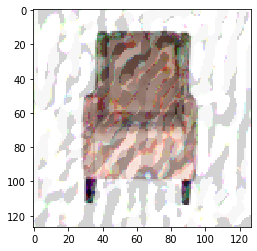

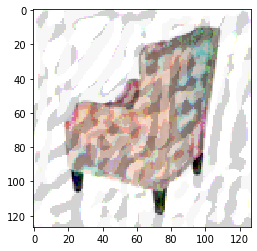

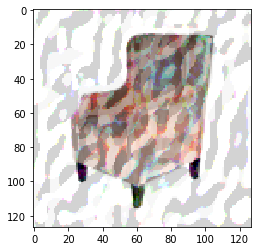

In [30]:
epsilon = 0.07
print()
I = np.clip(x+epsilon*np.sign(grad), 0, 1.0)
#I = np.clip(x + epsilon*np.float32(np.random.normal(size=x.shape)),0.0, 1.0)
I1 = I[0,0,:,:,:]
I2 = I[1,0,:,:,:]
I3 = I[2,0,:,:,:]

I1 = np.transpose(I1,(1,2,0))
I2 = np.transpose(I2,(1,2,0))
I3 = np.transpose(I3,(1,2,0))
plt.figure()
plt.imshow(I1)

plt.figure()
plt.imshow(I2)

plt.figure()
plt.imshow(I3)

In [38]:
np.max(I)

1.1

In [16]:
I1.shape

(3, 127, 127)

In [15]:
'''
Demo code for the paper

Choy et al., 3D-R2N2: A Unified Approach for Single and Multi-view 3D Object
Reconstruction, ECCV 2016
'''
import os
import sys
if (sys.version_info < (3, 0)):
    raise Exception("Please follow the installation instruction on 'https://github.com/chrischoy/3D-R2N2'")

import shutil
import numpy as np
from subprocess import call

from PIL import Image
from models import load_model
from lib.config import cfg, cfg_from_list
from lib.solver import Solver
from lib.voxel import voxel2obj

import os
import sys
import theano
import theano.tensor as T
import numpy as np
from datetime import datetime

from lib.config import cfg
from lib.utils import Timer

DEFAULT_WEIGHTS = 'output/ResidualGRUNet/default_model/weights.npy'


cfg_from_list(['CONST.BATCH_SIZE', 1])

def cmd_exists(cmd):
    return shutil.which(cmd) is not None


def download_model(fn):
    if not os.path.isfile(fn):
        # Download the file if doewn't exist
        print('Downloading a pretrained model')
        call(['curl', 'ftp://cs.stanford.edu/cs/cvgl/ResidualGRUNet.npy',
              '--create-dirs', '-o', fn])


def load_demo_images():
    ims = []
    for i in range(3):
        im = Image.open('imgs/%d.png' % i)
        ims.append([np.array(im).transpose(
            (2, 0, 1)).astype(np.float32) / 255.])
    return np.array(ims)



pred_file_name = 'prediction.obj'

# load images
demo_imgs = load_demo_images()

# Download and load pretrained weights
download_model(DEFAULT_WEIGHTS)

# Use the default network model
NetClass = load_model('ResidualGRUNet')

# Define a network and a solver. Solver provides a wrapper for the test function.
net = NetClass(compute_grad=False)  # instantiate a network
net.load(DEFAULT_WEIGHTS)                        # load downloaded weights
solver = Solver(net)                # instantiate a solver

solver._test_output = theano.function([solver.net.x, solver.net.y],
                                                [solver.net.output,
                                                 solver.net.loss,
                                                 *solver.net.activations])
n_vox = cfg.CONST.N_VOX
no_loss_return = True
y_val = np.zeros(
                (cfg.CONST.BATCH_SIZE, n_vox, 2, n_vox, n_vox)).astype(theano.config.floatX)
results = solver._test_output(demo_imgs, y_val)
prediction = results[0]
voxel2obj(pred_file_name, prediction[0, :, 1, :, :] > cfg.TEST.VOXEL_THRESH)

# Run the network
    #voxel_prediction, _ = solver.test_output(demo_imgs)

    # Save the prediction to an OBJ file (mesh file).
    #voxel2obj(pred_file_name, voxel_prediction[0, :, 1, :, :] > cfg.TEST.VOXEL_THRESH)

    # Use meshlab or other mesh viewers to visualize the prediction.
    # For Ubuntu>=14.04, you can install meshlab using
    # `sudo apt-get install meshlab`
    #if cmd_exists('meshlab'):
     #   call(['meshlab', pred_file_name])
    #else:
     #   print('Meshlab not found: please use visualization of your choice to view %s' %
      #        pred_file_name)




loading network parameters from output/ResidualGRUNet/default_model/weights.npy
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore mismatch
Ignore m

In [10]:
pred_file_name

'prediction.obj'

In [54]:
results = solver._test_output(I, y_val)

In [55]:
prediction = results[0]

In [57]:
voxel2obj(pred_file_name, prediction[0, :, 1, :, :] > cfg.TEST.VOXEL_THRESH)

In [ ]:
if cmd_exists('meshlab'):
        call(['meshlab', pred_file_name])
else:
    print('Meshlab not found: please use visualization of your choice to view %s' %
          pred_file_name)